In [1]:
#Generating and Saving Defect Masks

import os
import cv2
import numpy as np

DATASET_DIR = "PCB_DATASET"
IMAGES_DIR = os.path.join(DATASET_DIR, "images")
GOLDEN_DIR = os.path.join(DATASET_DIR, "PCB_USED")
OUTPUT_DIR = os.path.join(DATASET_DIR, "outputs_simple")

os.makedirs(OUTPUT_DIR, exist_ok=True)

def get_pcb_id(filename):
    return filename.split("_")[0]

for defect_type in os.listdir(IMAGES_DIR):
    defect_path = os.path.join(IMAGES_DIR, defect_type)
    if not os.path.isdir(defect_path):
        continue

    print(f"Processing: {defect_type}")
    out_folder = os.path.join(OUTPUT_DIR, defect_type)
    os.makedirs(out_folder, exist_ok=True)

    for img_name in os.listdir(defect_path):
        if not img_name.lower().endswith(('.jpg', '.png', '.jpeg')):
            continue

        img_path = os.path.join(defect_path, img_name)
        pcb_id = get_pcb_id(img_name)
        golden_path = os.path.join(GOLDEN_DIR, f"{pcb_id}.jpg")

        if not os.path.exists(golden_path):
            print(f"Golden image missing: {pcb_id}")
            continue

        golden = cv2.imread(golden_path, cv2.IMREAD_GRAYSCALE)
        defect = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if golden is None or defect is None:
            print(f"Failed to load: {img_name}")
            continue

        defect = cv2.resize(defect, (golden.shape[1], golden.shape[0]))
        diff = cv2.absdiff(golden, defect)
        _, mask = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

        save_path = os.path.join(out_folder, img_name.replace(".jpg", "_mask.jpg"))
        cv2.imwrite(save_path, mask)
        print(f"Saved: {save_path}")

print("All masks generated.")


Processing: Missing_hole
Saved: PCB_DATASET\outputs_simple\Missing_hole\01_missing_hole_01_mask.jpg
2_mask.jpg

Saved: PCB_DATASET\outputs_simple\Missing_hole\01_missing_hole_03_mask.jpg
4_mask.jpg

Saved: PCB_DATASET\outputs_simple\Missing_hole\01_missing_hole_05_mask.jpg
6_mask.jpg

Saved: PCB_DATASET\outputs_simple\Missing_hole\01_missing_hole_07_mask.jpg
8_mask.jpg

Saved: PCB_DATASET\outputs_simple\Missing_hole\01_missing_hole_09_mask.jpg
10_mask.jpg

Saved: PCB_DATASET\outputs_simple\Missing_hole\01_missing_hole_11_mask.jpg
2_mask.jpg

Saved: PCB_DATASET\outputs_simple\Missing_hole\01_missing_hole_13_mask.jpg
4_mask.jpg

Saved: PCB_DATASET\outputs_simple\Missing_hole\01_missing_hole_15_mask.jpg
6_mask.jpg

Saved: PCB_DATASET\outputs_simple\Missing_hole\01_missing_hole_17_mask.jpg
8_mask.jpg

Saved: PCB_DATASET\outputs_simple\Missing_hole\01_missing_hole_19_mask.jpg
20_mask.jpg

Saved: PCB_DATASET\outputs_simple\Missing_hole\04_missing_hole_01_mask.jpg
2_mask.jpg

Saved: PCB_DATAS

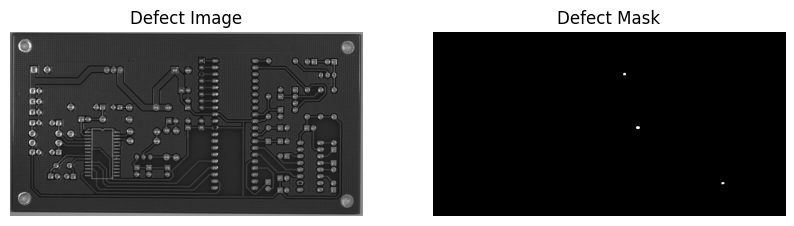

In [3]:
#Generating a Sample Image and Its Defect Mask

import os
import cv2
import matplotlib.pyplot as plt

OUTPUT_DIR = "PCB_DATASET/outputs_simple"
IMAGES_DIR = "PCB_DATASET/images"

sample_mask = os.path.join(OUTPUT_DIR, "Missing_hole", "01_missing_hole_01_mask.jpg")
sample_image = os.path.join(IMAGES_DIR, "Missing_hole", "01_missing_hole_01.jpg")

mask = cv2.imread(sample_mask, 0)
image = cv2.imread(sample_image, 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Defect Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Defect Mask")
plt.axis('off')

plt.show()
